<a href="https://colab.research.google.com/github/stephenbeckr/numerical-analysis-class/blob/master/Demos/Ch5_AbsoluteStability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Absolute stability
(In contrast to the 0-stability from before)

There are 2 parts to this demo:
1. show the regions of absolute stability for different methods
2. see how we can use this information to predict what happens on different ODEs

#### Setup some plotting code

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.interpolate
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams.update({'font.size': 20})

In [2]:
class Stability_plot:
  def __init__(self,limits=2,numPts = 50):
    x = np.linspace(-limits,limits)
    self.xx, self.yy = np.meshgrid(x, x)
    self.zz = self.xx + 1j*self.yy
    self.extent = (-limits,limits, -limits, limits)

    self.fig = None
    self.gca = None

  def add_plot(self,formula,label=''):
    if self.fig is None:
      self.fig, self.ax = plt.subplots(figsize=(7,7))

    Rz = np.abs( formula(self.zz) )
    cntr = self.ax.contour(self.xx, self.yy, Rz, [1], colors='k')
    self.ax.clabel( cntr, cntr.levels, inline=True,fmt=label)

    self.ax.axvline(x=0, linewidth=1, color='gray')
    self.ax.axhline(y=0, linewidth=1, color='gray')
    self.ax.set_title(label)
    self.ax.set_aspect('equal', 'box')
    self.ax.set_xlabel('Real($h\lambda$)')
    self.ax.set_ylabel('Imag($h\lambda$)')
  
  def plot(self,formula,label=''):

    Rz = np.abs( formula(self.zz) )

    plt.figure(figsize=(7,7))
    levels = np.linspace(0, 2, 21)
    # C = plt.contourf(self.xx, self.yy, Rz, levels )#, cmap=plt.cm.coolwarm)
    C = plt.imshow( Rz, extent = self.extent)
    cbar = plt.colorbar(C) #, ticks=np.linspace(0, 2, 5))
    plt.contourf(self.xx, self.yy, Rz, [0,1], colors='white',alpha=.3)

    plt.axvline(x=0, linewidth=1, color='gray')
    plt.axhline(y=0, linewidth=1, color='gray')
    plt.title(label)
    plt.gca().set_aspect('equal', 'box')
    plt.xlabel('Real($h\lambda$)')
    plt.ylabel('Imag($h\lambda$)')

## Forward Euler
$$Q(h\lambda) = h\lambda + 1$$

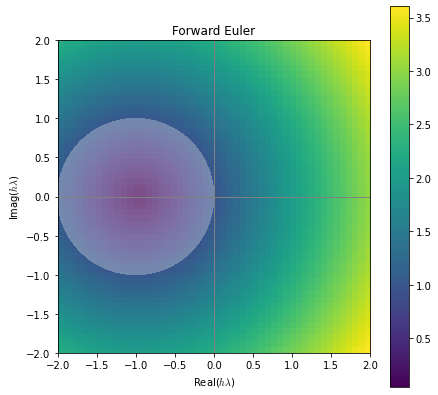

In [3]:
graph = Stability_plot()
graph.plot( lambda z : 1 + z, label='Forward Euler')

## Backward Euler (AM1)
$$Q(h\lambda) = \frac{1}{1-h\lambda}$$

In the plot below, everything **outside** of that disk is stable.  So Backward Euler has a VERY large stability region (in fact, it might have the largest region of all methods, or at least all common methods).  This is due to two factors:
1. it is an implicit method, which have good absolute stability properties
2. it is low-order (so bad for accuracy), and higher-order methods cannot have as nice absolute stability properties

Because the region of absolute stability includes the entire left-half plane, we call backward Euler to be **A-Stable**

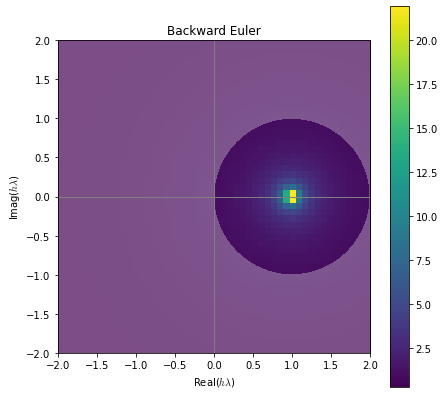

In [4]:
graph.plot( lambda z : 1/(1 - z), 'Backward Euler')

## Trapezoidal (AM2)
$$ Q(h\lambda) = \frac{2+h\lambda}{2-h\lambda}$$

Because the region of absolute stability includes the entire left-half plane, we call backward Euler to be **A-Stable**. 

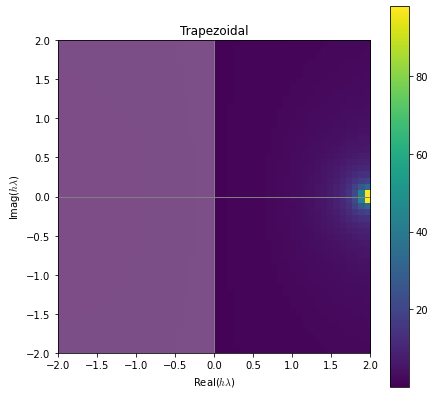

In [45]:
graph.plot( lambda z : (2+z)/(2 - z), 'Trapezoidal')

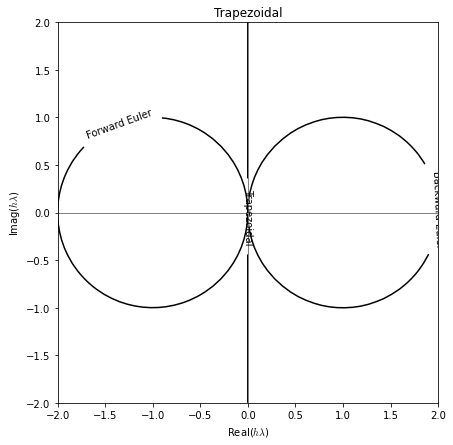

In [5]:
# Plot Eulers and Trapezoidal all together
graph = Stability_plot()
graph.add_plot( lambda z : 1 + z, 'Forward Euler')
graph.add_plot( lambda z : 1/(1 - z), 'Backward Euler')
graph.add_plot( lambda z : (2+z)/(2 - z), 'Trapezoidal')

## Backward differentiation rules
See [BDF on wikipedia](https://en.wikipedia.org/wiki/Backward_differentiation_formula)

Let's check the stability of the "BD" or "BDF" (backward differentiation formulas)

- BDF1: $y_{n+1} - y_n = h f(t_{n+1}, y_{n+1})$

- BDF2: $y_{n+2} - \tfrac43 y_{n+1} + \tfrac13 y_n = \tfrac23 h f(t_{n+2}, y_{n+2})$

- BDF3: $y_{n+3} - \tfrac{18}{11} y_{n+2} + \tfrac9{11} y_{n+1} - \tfrac2{11} y_n = \tfrac6{11} h f(t_{n+3}, y_{n+3})$

- BDF4: $y_{n+4} - \tfrac{48}{25} y_{n+3} + \tfrac{36}{25} y_{n+2} - \tfrac{16}{25} y_{n+1} + \tfrac{3}{25} y_n = \tfrac{12}{25} h f(t_{n+4}, y_{n+4})$

- BDF5: $y_{n+5} - \tfrac{300}{137} y_{n+4} + \tfrac{300}{137} y_{n+3} - \tfrac{200}{137} y_{n+2} + \tfrac{75}{137} y_{n+1} - \tfrac{12}{137} y_n = \tfrac{60}{137} h f(t_{n+5}, y_{n+5})$

- BDF6: $y_{n+6} - \tfrac{360}{147} y_{n+5} + \tfrac{450}{147} y_{n+4} - \tfrac{400}{147} y_{n+3} + \tfrac{225}{147} y_{n+2} - \tfrac{72}{147} y_{n+1} + \tfrac{10}{147} y_n = \tfrac{60}{147} h f(t_{n+6}, y_{n+6})$ 


### Zero-stability (aka root condition)
This is what we checked in the [Ch5_Stability.ipynb](Demos/Ch5_Stability.ipynb) demo.  We ignored the coefficient in front of $f$

### Absolute stability
This is what we're checking today.

- BDF1 is backward Euler, which we already did

- BDF2, the polynomial is $$Q^{(h\lambda)}(z) = \left(1-\frac23h\lambda\right)z^2 - \frac43z + \frac13,$$
so find region where all roots

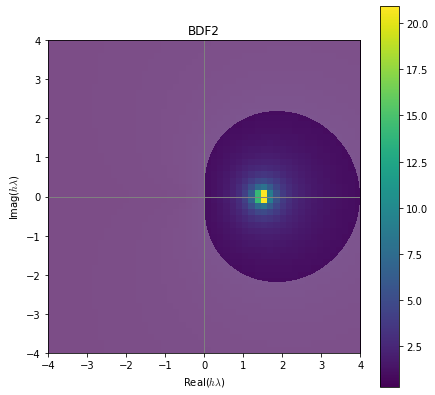

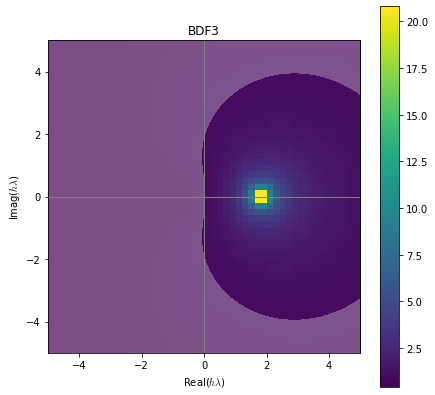

In [6]:
# BDF1 is just backward Euler, which we already did
def BDF_root(a,b):
  @np.vectorize
  def stability_fcn(hlambda):
    coeff = np.concatenate( ([a[0]-hlambda*b], a[1:]) )
    return np.linalg.norm(np.roots( coeff ),ord=np.Inf)
  return stability_fcn

def getBDFParameters( steps, forStabilityPlotting=False ):
  if steps==1: 
    denominator = 1
    a = [-1]
    b = 1
  elif steps==2:
    a = [-4,1]
    b = 2
    denominator = 3
  elif steps==3:
    a = [-18,9,-2]
    b = 6
    denominator = 11
  elif steps==4:
    a = [-48,36,-16,3]
    b = 12
    denominator = 25
  elif steps==5:
    a = [-300,300,-200,75,-12]
    b = 60
    denominator = 137
  else:
    raise ValueError('steps must be in [1,6]')
  if forStabilityPlotting is True:
    a = np.concatenate( ([denominator], a) )
  else:
    a = -np.flip( np.array(a) ) # need to flip order to match, and swap sign
  return (a,b,denominator)

# BDF2  (note: we ignore the common denominator "3")
a = [3,-4,1]
b = 2
(a,b,denominator) = getBDFParameters(2,forStabilityPlotting=True)
graph = Stability_plot(limits=4)
graph.plot( BDF_root(a,b), 'BDF2')

# BDF3  (note: we ignore the common denominator "11")
a = [11,-18,9,-2]
b = 6
(a,b,denominator) = getBDFParameters(3,forStabilityPlotting=True)
graph = Stability_plot(limits=5)
graph.plot( BDF_root(a,b), 'BDF3')

### BDF4 and BDF5
- BDF4: $y_{n+4} - \tfrac{48}{25} y_{n+3} + \tfrac{36}{25} y_{n+2} - \tfrac{16}{25} y_{n+1} + \tfrac{3}{25} y_n = \tfrac{12}{25} h f(t_{n+4}, y_{n+4})$

- BDF5: $y_{n+5} - \tfrac{300}{137} y_{n+4} + \tfrac{300}{137} y_{n+3} - \tfrac{200}{137} y_{n+2} + \tfrac{75}{137} y_{n+1} - \tfrac{12}{137} y_n = \tfrac{60}{137} h f(t_{n+5}, y_{n+5})$

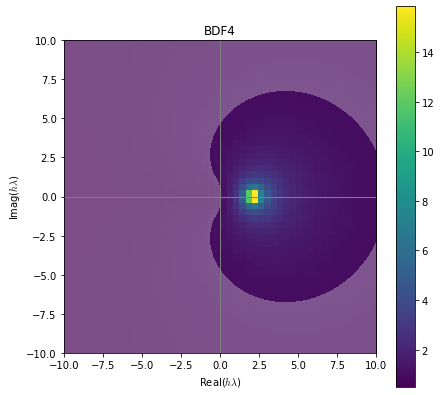

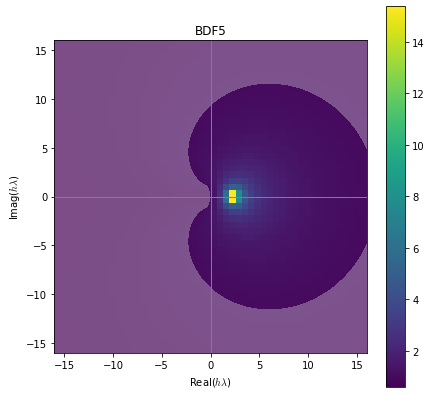

In [7]:
# BDF4  (note: we ignore the common denominator "25")
a = [25,-48,36,-16,3]
b = 12
(a,b,denominator) = getBDFParameters(4,forStabilityPlotting=True)
graph = Stability_plot(limits=10)
graph.plot( BDF_root(a,b), 'BDF4')

# BDF4  (note: we ignore the common denominator "137")
a = [137,-300,300,-200,75,-12]
b = 60
(a,b,denominator) = getBDFParameters(5,forStabilityPlotting=True)
graph = Stability_plot(limits=16)
graph.plot( BDF_root(a,b), 'BDF5')

#### Show all the BDF methods together

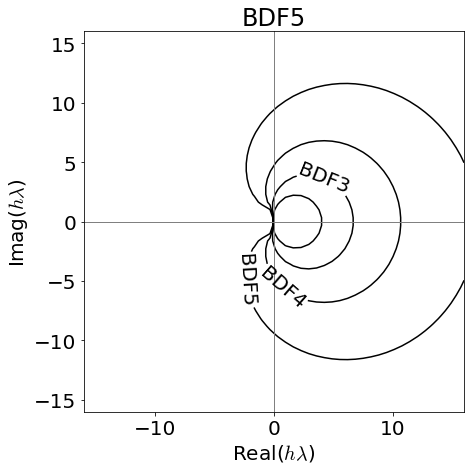

In [6]:
graph = Stability_plot(limits=16)

a = [3,-4,1]
b = 2
graph.add_plot( BDF_root(a,b), 'BDF2')

a = [11,-18,9,-2]
b = 6
graph.add_plot( BDF_root(a,b), 'BDF3')

a = [25,-48,36,-16,3]
b = 12
graph.add_plot( BDF_root(a,b), 'BDF4')

a = [137,-300,300,-200,75,-12]
b = 60
graph.add_plot( BDF_root(a,b), 'BDF5')

**Observations**: 
1. Like backward Euler, these methods are stable *except* inside these small regions. That's great! That's why these BDF are used a lot.
2. The lower-order BDF methods have a larger region of stability than the higher-order methods

## Adams-Bashforth methods

Coefficients via [wikipedia](https://en.wikipedia.org/wiki/Linear_multistep_method#Adams%E2%80%93Bashforth_methods)

$$\begin{align}
y_{n+1} &= y_n + hf(t_n, y_n) , \qquad\text{(This is the Euler method)} \\
y_{n+2} &= y_{n+1} + h\left( \frac{3}{2}f(t_{n+1}, y_{n+1}) - \frac{1}{2}f(t_n, y_n) \right) , \\
y_{n+3} &= y_{n+2} + h\left( \frac{23}{12} f(t_{n+2}, y_{n+2}) - \frac{16}{12} f(t_{n+1}, y_{n+1}) + \frac{5}{12}f(t_n, y_n)\right) , \\
y_{n+4} &= y_{n+3} + h\left( \frac{55}{24} f(t_{n+3}, y_{n+3}) - \frac{59}{24} f(t_{n+2}, y_{n+2}) + \frac{37}{24} f(t_{n+1}, y_{n+1}) - \frac{9}{24} f(t_n, y_n) \right) , \\
y_{n+5} &= y_{n+4} + h\left( \frac{1901}{720} f(t_{n+4}, y_{n+4}) - \frac{2774}{720} f(t_{n+3}, y_{n+3}) + \frac{2616}{720} f(t_{n+2}, y_{n+2}) - \frac{1274}{720} f(t_{n+1}, y_{n+1}) + \frac{251}{720} f(t_n, y_n) \right) .
\end{align}$$

Compare AB2 to AM2 (trapezoidal rule)


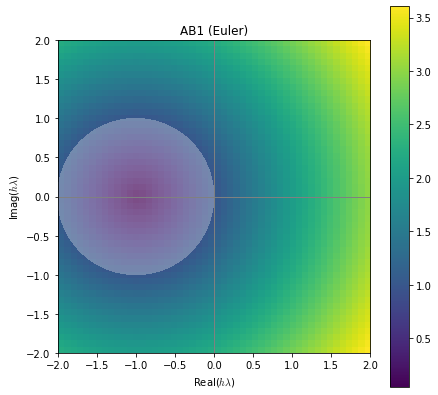

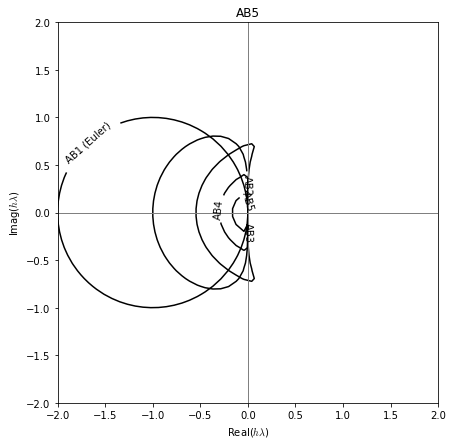

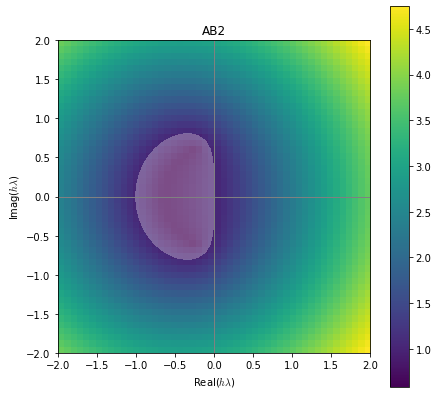

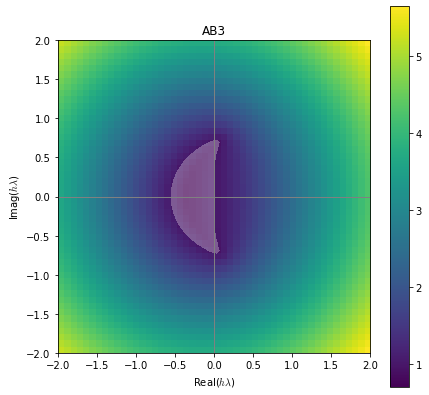

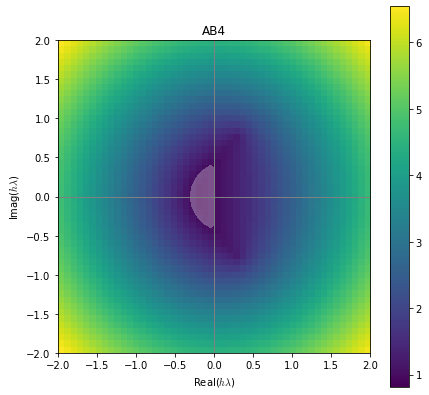

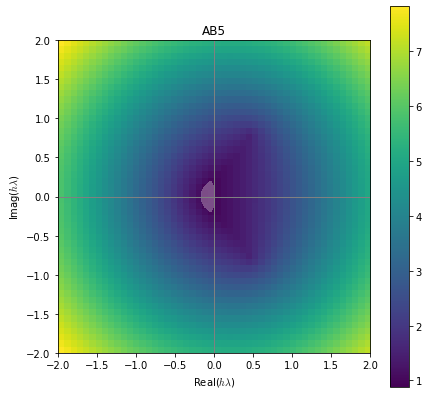

In [8]:
b = [1] # AB1, forward Euler
def AB_root(b):
  b = np.asarray(b)
  @np.vectorize
  def stability_fcn(hlambda):
    coeff = -hlambda*b
    coeff[0] -= 1 # for the a term
    coeff = np.concatenate( ([1], coeff ) )
    return np.linalg.norm(np.roots( coeff ),ord=np.Inf)
  return stability_fcn

graph = Stability_plot(limits=2)

graph.plot( AB_root(b), 'AB1 (Euler)')
graph.add_plot( AB_root(b), 'AB1 (Euler)')

b = [3/2,-1/2]
graph.plot( AB_root(b), 'AB2')
graph.add_plot( AB_root(b), 'AB2')
print("Compare AB2 to AM2 (trapezoidal rule)")

b = np.array([23,-16,5])/12
graph.plot( AB_root(b), 'AB3')
graph.add_plot( AB_root(b), 'AB3')

b = np.array([55,-59,37,-9])/24
graph.plot( AB_root(b), 'AB4')
graph.add_plot( AB_root(b), 'AB4')

b = np.array([1901,-2774,2616,-1274,251])/720
graph.plot( AB_root(b), 'AB5')
graph.add_plot( AB_root(b), 'AB5')

**Observations**
1. These methods are only absolutely stable *inside* a small region. Not as nice as the implicit methods AM or BDF
2. Again, the higher-order methods have smaller regions of absolute stability

# Now see the effects of stability
Run the various methods at the stepsizes

#### Implement some methods
We'll do:
1. RK4
2. Adams-Bashforth
3. Adams-Moulton
4. BDF

For RK4 regions of stability, see [this PDF (last page)](http://web.mit.edu/course/16/16.90/OldFiles/BackUp/www/pdfs/Chapter10.pdf) or this [small gif](http://www.scholarpedia.org/article/File:RK-stab.gif) from scholarpedia

In [12]:
def OneStepOfRK4(f,t,w,h):
  k1 = h*f(t,     w)
  k2 = h*f(t+h/2, w+k1/2)
  k3 = h*f(t+h/2, w+k2/2)
  k4 = h*f(t+h,   w+k3)
  return w + (k1+2*(k2+k3)+k4)/6

# Helpers for the implicit method
# We can also sometimes solve exactly (in particular for linear ODEs)
#   and yet another option is the secant method
def fixedPointIteration( g, x, maxIters = 5):
  """ solves x = g(x) """
  for k in range(maxIters):
    x = g(x)
  return x
def NewtonsMethod( f, fprime, x, maxIters = 5):
  """ solve f(x) = 0 """
  for k in range(maxIters):
    x -= f(x)/fprime(x)
  return x
  

def RK4( f, tspan, y0, h=0.1, n=None, dense_output=False):
  if n == None:
    n = int( (tspan[1] - tspan[0])/h )+1
  t, h = np.linspace(tspan[0],tspan[1],num=n,retstep=True)
  w    = np.zeros(n)
  dydt = np.zeros(n)
  w[0] = y0
  dydt[0] = f(t[0],y0)
  for i in range(n-1):
    w[i+1] = OneStepOfRK4(f, t[i], w[i], h)
    dydt[i+1] = f(t[i+1],w[i+1])
  if dense_output is True:
    sol = scipy.interpolate.CubicHermiteSpline(t,w,dydt)
    return t, w, sol
  else:  
    return t, w

def getAdamsBashforthParameters( steps ):
  # Weights here: https://en.wikipedia.org/wiki/Linear_multistep_method#Adams%E2%80%93Bashforth_methods
  if steps==1:
    weights = [1]  # this is forward Euler
    denominator = 1
  elif steps==2:
    weights = [3,-1]
    denominator = 2
  elif steps==3:
    weights = [23,-16,5]
    denominator = 12
  elif steps==4:
    weights = [55,-59,37,-9]
    denominator = 24
  elif steps==5:
    weights = [1901,-2774,2616,-1274,251]
    denominator = 720
  else:
    raise ValueError("steps should be 1, 2, 3, 4 or 5")
  weights = np.flip( np.array(weights) ) # need to flip order to match
  return weights, denominator

def getAdamsMoultonParameters( steps ):
  # Weights here: https://en.wikipedia.org/wiki/Linear_multistep_method#Adams%E2%80%93Bashforth_methods
  if steps==0:
    weights = []  # this is backward Euler
    bm = 1
    denominator = 1
  elif steps==1:
    weights = [1]
    bm = 1
    denominator = 2
  elif steps==2:
    weights = [8,-1]
    bm = 5
    denominator = 12
  elif steps==3:
    weights = [19,-5,1]
    bm = 9
    denominator = 24
  elif steps==4:
    weights = [646,-264,106,-19]
    bm = 251
    denominator = 720
  else:
    raise ValueError("steps should be 1, 2, 3, 4 or 5")
  weights = np.flip( np.array(weights) ) # need to flip order to match
  return weights, bm, denominator
  
def AdamsBashforth( f, tspan, y0, h=0.1, n=None, dense_output=False,steps=4,trueSolution = None):
  if n == None:
    n = int( (tspan[1] - tspan[0])/h )+1
  t, h = np.linspace(tspan[0],tspan[1],num=n,retstep=True)
  if steps < 0:
    raise ValueError("Need steps >= 0")
  w    = np.zeros(n)
  dydt = np.zeros(n)
  w[0] = y0
  dydt[0] = f(t[0],y0)

  weights, denominator = getAdamsBashforthParameters( steps )

  # use RK for the first few steps unless we cheat and use trueSolution
  if trueSolution is not None:
    for i in range(steps-1):
      w[i+1] = trueSolution( t[i+1] )
      dydt[i+1] = f(t[i+1],w[i+1])
  else:
    for i in range(steps-1):
      w[i+1] = OneStepOfRK4(f, t[i], w[i], h)
      dydt[i+1] = f(t[i+1],w[i+1])

  # The main loop:
  for i in range(steps-1,n-1):
    w[i+1]    = w[i] + h/denominator*np.dot(weights,dydt[i-steps+1:i+1])
    dydt[i+1] = f(t[i+1],w[i+1])

  if dense_output is True:
    sol = scipy.interpolate.CubicHermiteSpline(t,w,dydt)
    return t, w, sol
  else:  
    return t, w


def AdamsMoulton( f, tspan, y0, h=0.1, n=None, dense_output=False,steps=4,
                 invF = None,trueSolution = None):
  """ implicitSolver can be one of "Newton", "FixedPoint", or "Exact" """
  if n == None:
    n = int( (tspan[1] - tspan[0])/h )+1
  if invF == None:
    raise ValueError("This is an implicit method, we need invF to be defined")
  t, h = np.linspace(tspan[0],tspan[1],num=n,retstep=True)
  if steps < 0:
    raise ValueError("Need steps >= 0")
  w    = np.zeros(n)
  dydt = np.zeros(n)
  w[0] = y0
  dydt[0] = f(t[0],y0)

  weights, bm, denominator = getAdamsMoultonParameters( steps )

  # use RK for the first few steps unless we cheat and use trueSolution
  if trueSolution is not None:
    for i in range(steps-1):
      w[i+1] = trueSolution( t[i+1] )
      dydt[i+1] = f(t[i+1],w[i+1])
  else:
    for i in range(steps-1):
      w[i+1] = OneStepOfRK4(f, t[i], w[i], h)
      dydt[i+1] = f(t[i+1],w[i+1])

  # The main loop:
  if steps==0:
    # backward Euler
    for i in range(n-1):
      wTilde    = w[i]
      w[i+1]    = invF(wTilde,h,t[i+1])
      dydt[i+1] = f(t[i+1],w[i+1])
  else:
    hbm = h*bm/denominator  # no need to recompute this at every step
    for i in range(steps-1,n-1):
      wTilde    = w[i] + h/denominator*np.dot(weights,dydt[i-steps+1:i+1])
      w[i+1]    = invF(wTilde,hbm,t[i+1])
      dydt[i+1] = f(t[i+1],w[i+1])

  if dense_output is True:
    sol = scipy.interpolate.CubicHermiteSpline(t,w,dydt)
    return t, w, sol
  else:  
    return t, w
  
def BDF( f, tspan, y0, h=0.1, n=None, dense_output=False,steps=4,
                 invF = None,trueSolution = None):
  """ implicitSolver can be one of "Newton", "FixedPoint", or "Exact" """
  if n == None:
    n = int( (tspan[1] - tspan[0])/h )+1
  if invF == None:
    raise ValueError("This is an implicit method, we need invF to be defined")
  t, h = np.linspace(tspan[0],tspan[1],num=n,retstep=True)
  if steps < 0:
    raise ValueError("Need steps >= 0")
  w    = np.zeros(n)
  dydt = np.zeros(n)
  w[0] = y0
  dydt[0] = f(t[0],y0)

  weights, bm, denominator = getBDFParameters( steps )

  # use RK for the first few steps unless we cheat and use trueSolution
  if trueSolution is not None:
    for i in range(steps-1):
      w[i+1] = trueSolution( t[i+1] )
      dydt[i+1] = f(t[i+1],w[i+1])
  else:
    for i in range(steps-1):
      w[i+1] = OneStepOfRK4(f, t[i], w[i], h)
      dydt[i+1] = f(t[i+1],w[i+1])

  # The main loop:
  if steps==1:
    # backward Euler
    for i in range(n-1):
      wTilde    = w[i]
      w[i+1]    = invF(wTilde,h,t[i+1])
      dydt[i+1] = f(t[i+1],w[i+1])
  else:
    hbm = h*bm/denominator  # no need to recompute this at every step
    for i in range(steps-1,n-1):
      wTilde    = np.dot(weights,w[i-steps+1:i+1])/denominator
      w[i+1]    = invF(wTilde,hbm,t[i+1])
      dydt[i+1] = f(t[i+1],w[i+1])

  if dense_output is True:
    sol = scipy.interpolate.CubicHermiteSpline(t,w,dydt)
    return t, w, sol
  else:  
    return t, w

## Setup some test problems


#### Problem 1: our familiar test problem
Let's solve an IVP$$y' = -k (y-\cos(t))$$for $k=5$ and $0 \le t \le 20$ with $y(0)=0.2$.

There's a known true solution$$y(t)=\frac{y_0 - k^2}{k^2+1}e^{-kt} + k\frac{\sin(t) + k\cos(t)}{k^2+1}$$

In [10]:
k  = 5 # a parameter
def f(t,y):
  return -k*( y - np.cos(t) )

# for Newton's method
def Jacobian_f(t,y):
  """ This is \partial f / \partial y """
  return -k

y0 = .2
y_true = lambda t : (y0 - k**2/(k**2+1) )*np.exp(-k*t) + k*(np.sin(t) + k*np.cos(t))/(k**2+1)
tspan = [0.0,20.0];


# solution via Newton's method, wTilde + h*f(t,w) - w = 0
def invF_Newton(wTilde,h,t):
  return NewtonsMethod(lambda w : wTilde + h*f(t,w) - w,
                       lambda w : h*Jacobian_f(t,w) - 1, 
                       wTilde, maxIters=2)

def invF_FixedPoint(wTilde,h,t):
  return fixedPointIteration( lambda w : wTilde + h*f(t,w), wTilde,
                             maxIters=7)
  
# == choose how to solve implicit part ==
# invFunction = invF_Newton
invFunction = invF_FixedPoint

### Run the methods


Start by running them for a variety of $h$ stepsizes, so we can see if they converge at the order we think they ought to.  This is to check for bugs in our implementation

In [13]:
hList = np.logspace(-1,-3,8)
t  = np.linspace(tspan[0],tspan[1],1000)

# BDF (Backward Differentiation Formulas)
ListOfMethods_BDF = [1,2,3,4,5]
methodNames_BDF = ['BDF1 (backward Euler)','BDF2','BDF3','BDF4','BDF5']
Results_BDF = {}
for method in ListOfMethods_BDF:
  errorList = []
  for h in hList:
    tHist, wHist, y_interpolated = BDF( f, tspan, y0, h=h,trueSolution=y_true,
                                      dense_output=True, steps=method,
                                      invF = invFunction)
    err = np.linalg.norm( y_true(t) - y_interpolated(t), ord=np.inf)
    errorList.append( err )
  Results_BDF[method] = errorList
  
# AB (Adams-Bashforth)
ListOfMethods_AB = [1,2,3,4,5]
methodNames_AB = ['AB1 (forward Euler)','AB2','AB3','AB4','AB5']
Results_AB = {}
for method in ListOfMethods_AB:
  errorList = []
  for h in hList:
    tHist, wHist, y_interpolated = AdamsBashforth( f, tspan, y0, h=h,trueSolution=y_true,
                                                dense_output=True, steps=method)
    err = np.linalg.norm( y_true(t) - y_interpolated(t), ord=np.inf)
    errorList.append( err )
  Results_AB[method] = errorList

# AM (Adams-Moulton)
ListOfMethods_AM = [0,1,2,3,4]
methodNames_AM = ['AM1 (backward Euler)','AM2 (trapezoidal)','AM3','AM4','AM5']
Results_AM = {}
for method in ListOfMethods_AM:
  errorList = []
  for h in hList:
    tHist, wHist, y_interpolated = AdamsMoulton( f, tspan, y0, h=h,trueSolution=y_true,
                                                dense_output=True, steps=method,
                                                invF = invFunction)
    err = np.linalg.norm( y_true(t) - y_interpolated(t), ord=np.inf)
    errorList.append( err )
  Results_AM[method] = errorList

# RK
Results_RK = []
for h in hList:
  tHist, wHist, y_interpolated = RK4( f, tspan, y0, h=h, dense_output=True)
  err = np.linalg.norm( y_true(t) - y_interpolated(t), ord=np.inf)
  Results_RK.append( err )

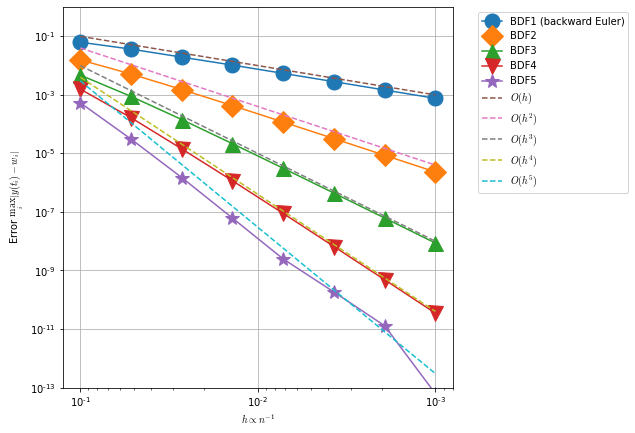

In [16]:
import itertools
marker = itertools.cycle(('o', 'D', '^', 'v', '*','s')) # https://stackoverflow.com/a/13092467
# list of markers: https://matplotlib.org/api/markers_api.html

plt.figure( figsize=(7,7))

# Plot BDF
for (method,name) in zip(ListOfMethods_BDF,methodNames_BDF):
  plt.loglog(hList, Results_BDF[method],".-",Marker=next(marker), MarkerSize=15,label=name);
  scaling = 100

# Plot AB
# for (method,name) in zip(ListOfMethods_AB,methodNames_AB):
#   plt.loglog(hList, Results_AB[method],".-",Marker=next(marker), MarkerSize=15,label=name);
#   scaling = 100

# Plot AM
# for (method,name) in zip(ListOfMethods_AM,methodNames_AM):
#   plt.loglog(hList, Results_AM[method],".-",Marker=next(marker), MarkerSize=15,label=name);
  # scaling = 10

# Plot RK
# plt.loglog(hList,Results_RK,'o-',MarkerSize=15,label='RK4')
# scaling = 7


plt.loglog(hList, scaling*1e-2*hList,'--',label='$O(h)$');
plt.loglog(hList, scaling*4e-2*hList**2,'--',label='$O(h^2)$');
plt.loglog(hList, scaling*1e-1*hList**3,'--',label='$O(h^3)$');
plt.loglog(hList, scaling*4e-1*hList**4,'--',label='$O(h^4)$');
plt.loglog(hList, scaling*3e0*hList**5,'--',label='$O(h^5)$');
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');
plt.grid()
plt.ylabel('Error $\max_i |y(t_i) - w_i|$')
plt.gca().invert_xaxis() # think of it as 1/h
plt.xlabel('$h \propto n^{-1}$');
plt.ylim(top=1,bottom=1e-13)
plt.show()

### Problem 2: the exact Dahlquist test equation
$$ y' = \lambda y$$

What happens if $\lambda > 0$? The exact solution should grow, but if $h$ is chosen so that the method is absolutely stable, then the numerical solution decays. So that's inaccurate also!

In [18]:
lam = -40 # don't use "lambda" since that's a special keyword in Python

def f(t,y):
  return lam*y

def Jacobian_f(t,y):
  """ This is \partial f / \partial y """
  return lam

def invFunction(wTilde,h,t):
  return NewtonsMethod(lambda w : wTilde + h*f(t,w) - w,
                       lambda w : h*Jacobian_f(t,w) - 1, 
                       wTilde, maxIters=2)

y0 = .2
y_true = lambda t : y0*np.exp(lam*t)
tspan = [0.0,10.0];

In [19]:
hList = np.logspace(-1.5,-2,16)
t  = np.linspace(tspan[0],tspan[1],1000)

# BDF (Backward Differentiation Formulas)
ListOfMethods_BDF = [1,2,3,4,5]
methodNames_BDF = ['BDF1 (backward Euler)','BDF2','BDF3','BDF4','BDF5']
Results_BDF = {}
for method in ListOfMethods_BDF:
  errorList = []
  for h in hList:
    tHist, wHist, y_interpolated = BDF( f, tspan, y0, h=h,trueSolution=y_true,
                                      dense_output=True, steps=method,
                                      invF = invFunction)
    err = np.linalg.norm( y_true(t) - y_interpolated(t), ord=np.inf)
    errorList.append( err )
  Results_BDF[method] = errorList
  
# AB (Adams-Bashforth)
ListOfMethods_AB = [1,2,3,4,5]
methodNames_AB = ['AB1 (forward Euler)','AB2','AB3','AB4','AB5']
Results_AB = {}
for method in ListOfMethods_AB:
  errorList = []
  for h in hList:
    tHist, wHist, y_interpolated = AdamsBashforth( f, tspan, y0, h=h,trueSolution=y_true,
                                                dense_output=True, steps=method)
    err = np.linalg.norm( y_true(t) - y_interpolated(t), ord=np.inf)
    errorList.append( err )
  Results_AB[method] = errorList

# AM (Adams-Moulton)
ListOfMethods_AM = [0,1,2,3,4]
methodNames_AM = ['AM1 (backward Euler)','AM2 (trapezoidal)','AM3','AM4','AM5']
Results_AM = {}
for method in ListOfMethods_AM:
  errorList = []
  for h in hList:
    tHist, wHist, y_interpolated = AdamsMoulton( f, tspan, y0, h=h,trueSolution=y_true,
                                                dense_output=True, steps=method,
                                                invF = invFunction)
    err = np.linalg.norm( y_true(t) - y_interpolated(t), ord=np.inf)
    errorList.append( err )
  Results_AM[method] = errorList

# RK
Results_RK = []
for h in hList:
  tHist, wHist, y_interpolated = RK4( f, tspan, y0, h=h, dense_output=True)
  err = np.linalg.norm( y_true(t) - y_interpolated(t), ord=np.inf)
  Results_RK.append( err )

See how Adams-Moulton methods did

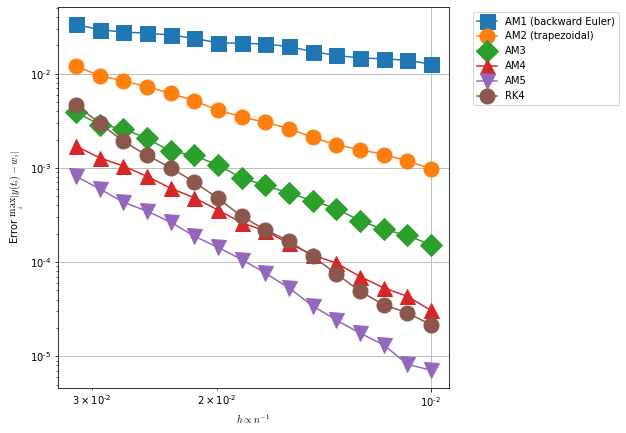

In [20]:
plt.figure( figsize=(7,7))

# Plot AM
for (method,name) in zip(ListOfMethods_AM,methodNames_AM):
  plt.loglog(hList, Results_AM[method],".-",Marker=next(marker), MarkerSize=15,label=name);
  scaling = 10

# Plot RK
plt.loglog(hList,Results_RK,'o-',MarkerSize=15,label='RK4')
scaling = 7

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');
plt.grid()
plt.ylabel('Error $\max_i |y(t_i) - w_i|$')
plt.gca().invert_xaxis() # think of it as 1/h
plt.xlabel('$h \propto n^{-1}$');
# plt.ylim(top=1,bottom=1e-13)
plt.show()

See how BDF methods did

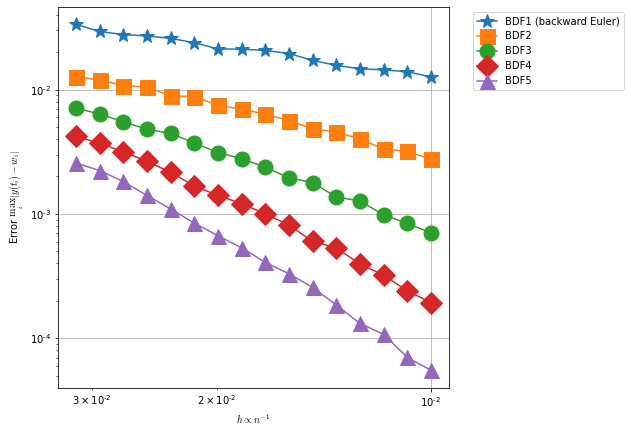

In [21]:
plt.figure( figsize=(7,7))

# Plot BDF
for (method,name) in zip(ListOfMethods_BDF,methodNames_BDF):
  plt.loglog(hList, Results_BDF[method],".-",Marker=next(marker), MarkerSize=15,label=name);

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');
plt.grid()
plt.ylabel('Error $\max_i |y(t_i) - w_i|$')
plt.gca().invert_xaxis() # think of it as 1/h
plt.xlabel('$h \propto n^{-1}$');
# plt.ylim(top=1,bottom=1e-13)
plt.show()

See how Adams-Bashforth methods did

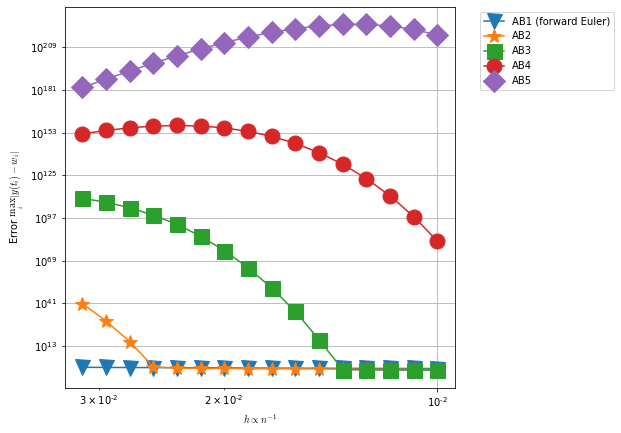

In [22]:
plt.figure( figsize=(7,7))

# Plot AB
for (method,name) in zip(ListOfMethods_AB,methodNames_AB):
  plt.loglog(hList, Results_AB[method],".-",Marker=next(marker), MarkerSize=15,label=name);
  scaling = 100

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');
plt.grid()
plt.ylabel('Error $\max_i |y(t_i) - w_i|$')
plt.gca().invert_xaxis() # think of it as 1/h
plt.xlabel('$h \propto n^{-1}$');
# plt.ylim(top=1,bottom=1e-13)
plt.show()

Interesting!   AM and BDF were fine.  For AB, AB1 was fine, but AB2 and AB3 were terrible for certain stepsizes, and AB4 and AB5 are even worse

AB2 starts to behave for h ~ 0.0136, i.e., h\lambda ~ -0.5437
and had problems for h ~ 0.0147, i.e., h\lambda ~ -0.5871


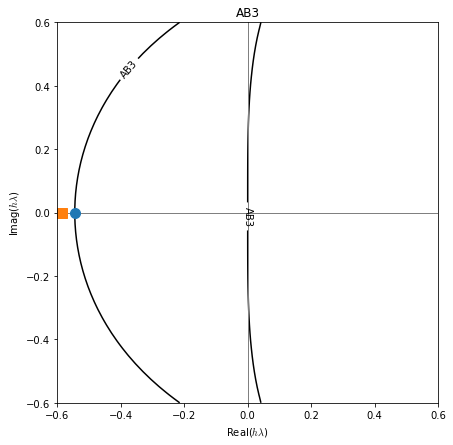

In [24]:
method = 3
# print( Results_AB[method] )
index = np.argwhere( np.array(Results_AB[method]) <= 1e-2 )[0][0]
h = hList[index]
print(f'AB2 starts to behave for h ~ {h:.4f}, i.e., h\lambda ~ {h*lam:.4f}')
h = hList[index-1]
print(f'and had problems for h ~ {h:.4f}, i.e., h\lambda ~ {h*lam:.4f}')

graph = Stability_plot(limits=.6)
b = np.array([23,-16,5])/12
# graph.plot( AB_root(b), 'AB3')
graph.add_plot( AB_root(b), 'AB3')
graph.ax.plot( hList[index]*lam, 0, 'o', MarkerSize = 10 )
graph.ax.plot( hList[index-1]*lam, 0, 's', MarkerSize = 10 )
graph.fig.show()

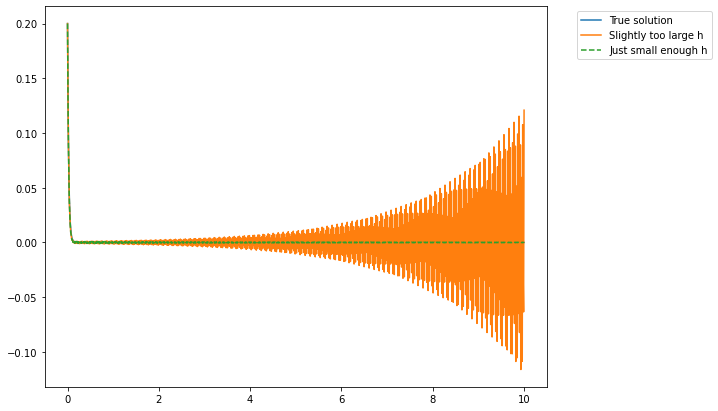

In [25]:
h   = 1.01*hList[index]
tHist, wHist, y_interp1 = AdamsBashforth( f, tspan, y0, h=h,trueSolution=y_true,
                                              dense_output=True, steps=method)
h   = 1.0*hList[index]
tHist, wHist, y_interp2 = AdamsBashforth( f, tspan, y0, h=h,trueSolution=y_true,
                                              dense_output=True, steps=method)

plt.figure( figsize=(9,7))
plt.plot( t, y_true(t), label='True solution')
plt.plot( t, y_interp1(t), label='Slightly too large h')
plt.plot( t, y_interp2(t), '--',label='Just small enough h')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');
plt.show()

We can see that for short-times, there was no issue:

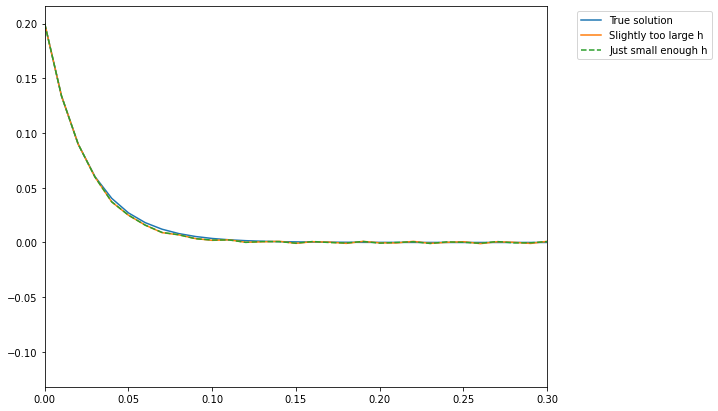

In [26]:
plt.figure( figsize=(9,7))
plt.plot( t, y_true(t), label='True solution')
plt.plot( t, y_interp1(t), label='Slightly too large h')
plt.plot( t, y_interp2(t), '--',label='Just small enough h')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');
plt.xlim(left=0,right=.3) # For short-time, everything looks great
plt.show()

We can see the benefits of implicit methods for this problem!

### Problem 3: imaginary numbers

$$ y' = \lambda\cos(\lambda t), y(0) = 0$$
so $y(t) = \sin(\lambda t)$

This is our approximation to 
$$y' = i y, \, i=\sqrt{-1}$$
which has solution $y(t) = e^{it} = \cos(t) + i\sin(t)$

Our implementations hasn't been checked for working with complex numbers, so we're not going to try $\lambda=\sqrt{-1}$

In [27]:
lam = -40 # don't use "lambda" since that's a special keyword in Python

def f(t,y):
  return lam*np.cos(lam*t)

def Jacobian_f(t,y):
  """ This is \partial f / \partial y """
  return 0

def invFunction(wTilde,h,t):
  return wTilde + h*f(t,wTilde)

y0 = 0
y_true = lambda t : np.sin(lam*t)
tspan = [0.0,10.0];

In [28]:
hList = np.logspace(-.5,-2,20)
t  = np.linspace(tspan[0],tspan[1],1000)

# BDF (Backward Differentiation Formulas)
ListOfMethods_BDF = [1,2,3,4,5]
methodNames_BDF = ['BDF1 (backward Euler)','BDF2','BDF3','BDF4','BDF5']
Results_BDF = {}
for method in ListOfMethods_BDF:
  errorList = []
  for h in hList:
    tHist, wHist, y_interpolated = BDF( f, tspan, y0, h=h,trueSolution=y_true,
                                      dense_output=True, steps=method,
                                      invF = invFunction)
    err = np.linalg.norm( y_true(t) - y_interpolated(t), ord=np.inf)
    errorList.append( err )
  Results_BDF[method] = errorList
  
# AB (Adams-Bashforth)
ListOfMethods_AB = [1,2,3,4,5]
methodNames_AB = ['AB1 (forward Euler)','AB2','AB3','AB4','AB5']
Results_AB = {}
for method in ListOfMethods_AB:
  errorList = []
  for h in hList:
    tHist, wHist, y_interpolated = AdamsBashforth( f, tspan, y0, h=h,trueSolution=y_true,
                                                dense_output=True, steps=method)
    err = np.linalg.norm( y_true(t) - y_interpolated(t), ord=np.inf)
    errorList.append( err )
  Results_AB[method] = errorList

# AM (Adams-Moulton)
ListOfMethods_AM = [0,1,2,3,4]
methodNames_AM = ['AM1 (backward Euler)','AM2 (trapezoidal)','AM3','AM4','AM5']
Results_AM = {}
for method in ListOfMethods_AM:
  errorList = []
  for h in hList:
    tHist, wHist, y_interpolated = AdamsMoulton( f, tspan, y0, h=h,trueSolution=y_true,
                                                dense_output=True, steps=method,
                                                invF = invFunction)
    err = np.linalg.norm( y_true(t) - y_interpolated(t), ord=np.inf)
    errorList.append( err )
  Results_AM[method] = errorList

# RK
Results_RK = []
for h in hList:
  tHist, wHist, y_interpolated = RK4( f, tspan, y0, h=h, dense_output=True)
  err = np.linalg.norm( y_true(t) - y_interpolated(t), ord=np.inf)
  Results_RK.append( err )

See how Adams-Bashforth does

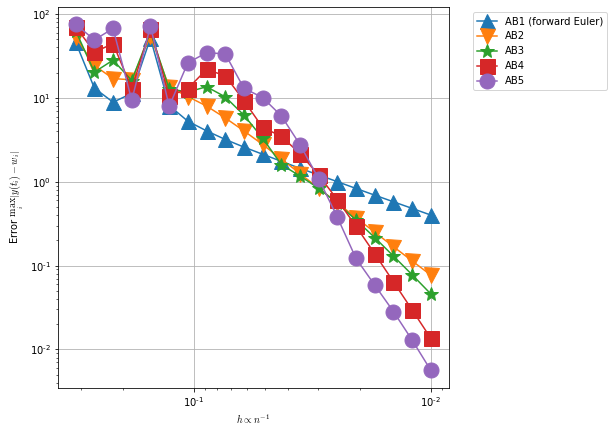

In [29]:
plt.figure( figsize=(7,7))

# Plot AB
for (method,name) in zip(ListOfMethods_AB,methodNames_AB):
  plt.loglog(hList, Results_AB[method],".-",Marker=next(marker), MarkerSize=15,label=name);
  scaling = 100

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');
plt.grid()
plt.ylabel('Error $\max_i |y(t_i) - w_i|$')
plt.gca().invert_xaxis() # think of it as 1/h
plt.xlabel('$h \propto n^{-1}$');
# plt.ylim(top=1,bottom=1e-13)
plt.show()

See how BDF methods do

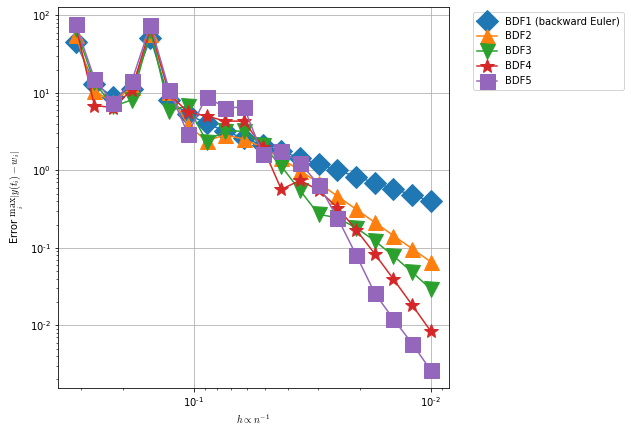

In [30]:
plt.figure( figsize=(7,7))

# Plot BDF
for (method,name) in zip(ListOfMethods_BDF,methodNames_BDF):
  plt.loglog(hList, Results_BDF[method],".-",Marker=next(marker), MarkerSize=15,label=name);

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');
plt.grid()
plt.ylabel('Error $\max_i |y(t_i) - w_i|$')
plt.gca().invert_xaxis() # think of it as 1/h
plt.xlabel('$h \propto n^{-1}$');
# plt.ylim(top=1,bottom=1e-13)
plt.show()

See how Adams-Moulton methods do

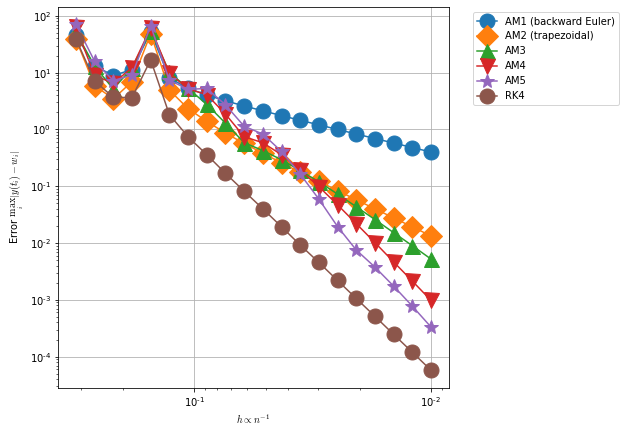

In [31]:
plt.figure( figsize=(7,7))

# Plot AM
for (method,name) in zip(ListOfMethods_AM,methodNames_AM):
  plt.loglog(hList, Results_AM[method],".-",Marker=next(marker), MarkerSize=15,label=name);
  scaling = 10

# Plot RK
plt.loglog(hList,Results_RK,'o-',MarkerSize=15,label='RK4')
scaling = 7

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');
plt.grid()
plt.ylabel('Error $\max_i |y(t_i) - w_i|$')
plt.gca().invert_xaxis() # think of it as 1/h
plt.xlabel('$h \propto n^{-1}$');
# plt.ylim(top=1,bottom=1e-13)
plt.show()

### Explore more

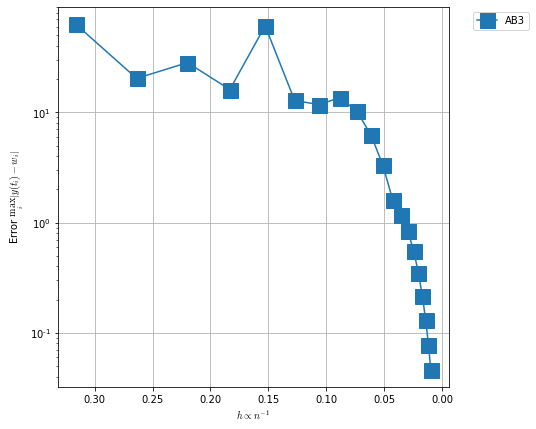

In [32]:
plt.figure( figsize=(7,7))

method = 3
plt.semilogy(hList, Results_AB[method],".-",Marker=next(marker), MarkerSize=15,label='AB3');

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');
plt.grid()
plt.ylabel('Error $\max_i |y(t_i) - w_i|$')
plt.gca().invert_xaxis() # think of it as 1/h
plt.xlabel('$h \propto n^{-1}$');
# plt.ylim(top=1,bottom=1e-13)
plt.show()

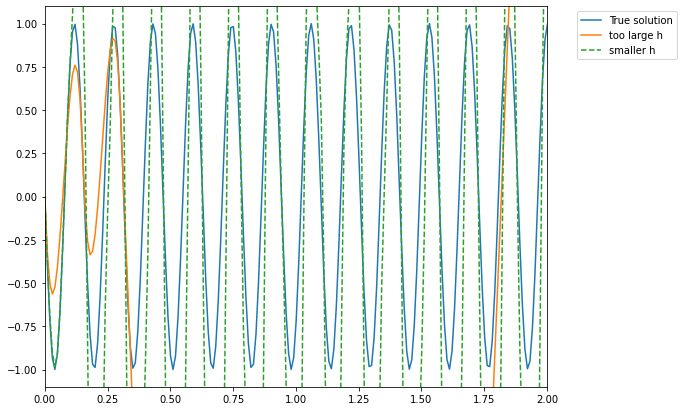

In [33]:
h   = .1
h   = .15
# h   = .2
tHist, wHist, y_interp1 = AdamsBashforth( f, tspan, y0, h=h,trueSolution=y_true,
                                              dense_output=True, steps=method)
h   = .05
tHist, wHist, y_interp2 = AdamsBashforth( f, tspan, y0, h=h,trueSolution=y_true,
                                              dense_output=True, steps=method)

plt.figure( figsize=(9,7))
plt.plot( t, y_true(t), label='True solution')
plt.plot( t, y_interp1(t), label='too large h')
plt.plot( t, y_interp2(t), '--',label='smaller h')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');
plt.xlim(left=0,right=2) # For short-time, everything looks great
plt.ylim((-1.1,1.1))
plt.show()